In [1]:
import numpy as np
import matplotlib.pyplot as plt
from EBL_fit_MC_functions import *
import scipy as sc

import ipywidgets as widgets
from IPython.display import display

from joblib import Parallel, delayed

In [3]:
x_vals = np.logspace(-3,6,1000)
y_1 = (x_vals/5)**-2
y_2 = y_1 * (x_vals/30)**-0.5

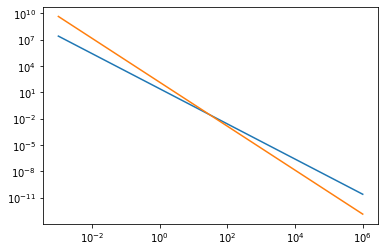

In [4]:
plt.plot(x_vals,y_1)
plt.plot(x_vals,y_2)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [5]:
Non = np.array([2000, 340, 0, 17, 95])
Noff = np.array([3000, 17, 400, 40, 0])
mu_gam = np.array([3,4,5,0,55])
mu_bg = np.array([25, 3, 0, 65, 18])
# Non = N_rnd(12, mu_on)

def f1(Non, Noff, mu_gam):
    return Non + Noff + mu_gam
def f2(Non, Noff):
    return Non - Noff
def f3(Non, Noff):
    mu_gam2 = 30000
    return Non + Noff + mu_gam2
def f4(Non, Noff):
    return 235564

conditions = [((Non >= 20)| (Noff >= 20)) & ((Non > 0 ) & (Noff > 0)), (Non != 0) & (Noff != 0), (Non == 0), (Noff == 0)]
choices = ["f1(Non, Noff, mu_gam)", "f2(Non, Noff)", "f3(Non,Noff)", "f4(Non, Noff)"]
res = np.select(conditions, choices, default=70)
# res = np.where((Non>20) & (Noff>20), f1(Non,Noff, mu_gam), f2(Non,Noff)) + np.where((Non>0) & (Noff == 0))
print(Non)
print(Noff)
print(res)

[2000  340    0   17   95]
[3000   17  400   40    0]
['f1(Non, Noff, mu_gam)' 'f1(Non, Noff, mu_gam)' 'f3(Non,Noff)'
 'f1(Non, Noff, mu_gam)' 'f4(Non, Noff)']


In [6]:
logL = -mu_gam - 6 * mu_bg + Non * np.log(mu_gam + mu_bg) + Noff * np.log(5 * mu_bg) - np.log(sc.special.factorial(Non) * sc.special.factorial(Noff))
logL2 = np.log(sc.stats.poisson.pmf(Non, mu_gam+mu_bg)* sc.stats.poisson.pmf(Noff, 5 * mu_bg))

print(logL)
print(logL2)

[         -inf          -inf          -inf -231.50812228  -96.22141196]
[         -inf          -inf          -inf -231.50812228  -96.22141196]


/tmp/ipykernel_5629/1378640056.py:1: RuntimeWarning: divide by zero encountered in log
  logL = -mu_gam - 6 * mu_bg + Non * np.log(mu_gam + mu_bg) + Noff * np.log(5 * mu_bg) - np.log(sc.special.factorial(Non) * sc.special.factorial(Noff))
/tmp/ipykernel_5629/1378640056.py:2: RuntimeWarning: divide by zero encountered in log
  logL2 = np.log(sc.stats.poisson.pmf(Non, mu_gam+mu_bg)* sc.stats.poisson.pmf(Noff, 5 * mu_bg))


In [7]:
sc.stats.poisson.pmf(Non, mu_gam+mu_bg)

array([0.00000000e+00, 0.00000000e+00, 6.73794700e-03, 1.09475572e-12,
       1.98643846e-03])

WIDGETS

In [8]:
widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)

IntSlider(value=3, description='Slider:', max=10)

In [15]:
patata = widgets.IntSlider()
display(patata)

IntSlider(value=0)

In [17]:
print(patata.value)

46


In [21]:
text = widgets.IntText()
slider = widgets.IntSlider()
display(text, slider)
widgets.jslink((slider, 'value'), (text, 'value'))

IntText(value=0)

IntSlider(value=0)

Link(source=(IntSlider(value=0), 'value'), target=(IntText(value=0), 'value'))

In [22]:
print(dir(widgets))

['Accordion', 'AppLayout', 'Audio', 'BoundedFloatText', 'BoundedIntText', 'Box', 'Button', 'ButtonStyle', 'CallbackDispatcher', 'Checkbox', 'Color', 'ColorPicker', 'Combobox', 'Controller', 'CoreWidget', 'DOMWidget', 'DatePicker', 'Datetime', 'Dropdown', 'FileUpload', 'FloatLogSlider', 'FloatProgress', 'FloatRangeSlider', 'FloatSlider', 'FloatText', 'GridBox', 'GridspecLayout', 'HBox', 'HTML', 'HTMLMath', 'Image', 'IntProgress', 'IntRangeSlider', 'IntSlider', 'IntText', 'Label', 'Layout', 'NumberFormat', 'Output', 'Password', 'Play', 'RadioButtons', 'Select', 'SelectMultiple', 'SelectionRangeSlider', 'SelectionSlider', 'SliderStyle', 'Style', 'Tab', 'Text', 'Textarea', 'ToggleButton', 'ToggleButtons', 'ToggleButtonsStyle', 'TwoByTwoLayout', 'VBox', 'Valid', 'ValueWidget', 'Video', 'Widget', '__builtins__', '__cached__', '__doc__', '__file__', '__jupyter_widgets_base_version__', '__jupyter_widgets_controls_version__', '__loader__', '__name__', '__package__', '__path__', '__protocol_vers

In [24]:
fit_func_name = widgets.Dropdown(options = ["PWL", "LP", "MBPWL", "freeLP"])
display(fit_func_name)

Dropdown(options=('PWL', 'LP', 'MBPWL', 'freeLP'), value='PWL')

In [37]:
Source_flux = widgets.FloatText(value=8.7e-6,
    min=1e-8,
    max=1e-3,
    step=1e-7,
    description='Source flux:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)
Source_flux_slider = widgets.FloatLogSlider(value=10,
    base=10,
    min=-8, # max exponent of base
    max=-3, # min exponent of base
    step=0.2, # exponent step
    description='Source flux')
widgets.jslink((Source_flux, 'value'), (Source_flux_slider, 'value'))
display(Source_flux, Source_flux_slider)

FloatText(value=8.7e-06, continuous_update=True, description='Source flux:', step=1e-07)

FloatLogSlider(value=0.001, description='Source flux', max=-3.0, min=-8.0, step=0.2)

In [54]:
potato = widgets.Checkbox(
    value=True,
    description='potato',
    disabled=False,
    indent=True,
    continuous_update=True,
)
mongeto = widgets.Checkbox(
    value=True,
    description='Mongeto',
    disabled=False,
)
box = widgets.Box([potato, mongeto, potato, mongeto, potato, mongeto])
display(box)
print(potato.value)

Box(children=(Checkbox(value=True, description='potato'), Checkbox(value=True, description='Mongeto'), Checkbo…

True


In [59]:
first_bin = widgets.FloatSlider(min = 0., max = 1., value = 0., step = 0.01, description = "First alpha bin")
last_bin = widgets.FloatSlider(min = 1., max = 2., value = 2., step = 0.01, description = "Last alpha bin")
step  = widgets.FloatSlider(min = 0.01, max = 0.1, value = 0.05, step = 0.01, description = "Alpha bin width (step)")
initial_guess_pos = widgets.FloatSlider(value = 2., description = "Initial guess alpha position")
widgets.jslink((first_bin, 'value'), (initial_guess_pos, 'min'))
widgets.jslink((last_bin, 'value'), (initial_guess_pos, 'max'))
widgets.jslink((step, 'value'), (initial_guess_pos, 'step'))
display(widgets.HBox([first_bin,last_bin,step, initial_guess_pos]))

'TITLE'

In [57]:
display("TITLE")

'TITLE'

In [74]:
np.inf >= 999999999999999


True

In [13]:
def testinbgjob(iter):
    i = iter
    a = np.array([1,2,3])
    return i * a


In [14]:
totals = Parallel(n_jobs = -2)(delayed(testinbgjob)(patata) for patata in range(5))
print(totals)

[array([0, 0, 0]), array([1, 2, 3]), array([2, 4, 6]), array([3, 6, 9]), array([ 4,  8, 12])]


In [15]:
def testrand(iter):
    my_generator = np.random.default_rng(iter)
    patata = my_generator.poisson(175)
    return patata

randoms = Parallel(n_jobs=-2)(delayed(testrand)(tont) for tont in range(5))
print(randoms)

[180, 175, 165, 153, 203]


In [ ]:
#esta a mitges
    def process(alpha0):
        global alpha
        alpha = alpha0   
        things = fit(initial_guess = initial_guess_0)
        if things.valid == False:
            raise Warning("The minimum is not valid")
        # if alpha == 1:
        #     print("The best fit params for alpha = 1 are: ", things.values)
        return m2LogL(things.values)



for i, alpha in enumerate(alphas):
            ydata, ydata_u = SED_alpha(alpha, dNdE_b, dNdE_b_u, tau, E_final)
            initial_guess = initial_guess_mat[i] #phi_0, lam1, deltas (len(deltas)=knots))
            if alpha == initial_guess_pos:
                initial_guess = initial_guess_mat[0]
            things = fit(initial_guess=initial_guess)
            if i < (len(alphas)):
                initial_guess_mat[i+1] = things.values
            chi2 = chisq(ydata, fit_func(E_final, things.values), ydata_u)
            chisqs.append(chi2)



    def process2(iter, alphas, mu_on, mu_off):
        chisqs = []
        i = iter
        my_generator = np.random.default_rng(rng_num)
        Non, Noff = my_generator.poisson(mu_on), my_generator.poisson(5 * mu_off)
        Non_u, Noff_u = np.sqrt(Non), np.sqrt(Noff)
        things = fit(initial_guess=initial_guess_0)
        initial_guess_mat = ig_mat_create(fit_func_name, alphas, knots)
        initial_guess_mat[0] = things.values
        for i, alpha in enumerate(alphas):
            initial_guess = initial_guess_mat[i]
            if alpha == initial_guess_pos:
                initial_guess = initial_guess_mat[0]
            things = fit(initial_guess = initial_guess)
            if i < len(alphas):
                initial_guess_mat[i+1] = things.values
            chi2 = m2LogL(things.values)
            chisqs.append(chi2)
        return chisqs




        print(2)

    alphas_iter = []
    chisqs_iter = []
#fins aquí 
    if niter == 1:
        if fit_func_name == "MBPWL":
                
            alphas = alphas_creation(initial_guess_pos, first_bin, last_bin, step)
            chisqs = []

            mu_on = mu_vec_final + bckgmu_final
            mu_off = bckgmu_final 

            rng_num = 231654
            my_generator = np.random.default_rng(rng_num)
            Non, Noff = my_generator.poisson(mu_on), my_generator.poisson(5 * mu_off)
            Non_u, Noff_u = np.sqrt(Non), np.sqrt(Noff)
            chisqs = Parallel(n_jobs=5)(delayed(process)(alpha0) for alpha0 in alphas)

            print("The minimum for the -2logL is at: ", alphas[np.where(chisqs == min(chisqs))])
            plt.plot(alphas, chisqs, 'o')
            # plt.yscale('log')
            plt.xlabel(r'$\alpha$')
            plt.ylabel(r'$-2log(L/L_{max})$')
            plt.show()

In [16]:
def testing2(a,b,c):
    d = a + b
    return d,c

d,c = testing2(1,2,3)
print(d,c)

3 3


In [22]:
a = np.arange(1, 4, 0.5)
aas = np.tile(a, [4,1])
print(aas)

[array([1. , 1.5, 2. , 2.5, 3. , 3.5]), array([1. , 1.5, 2. , 2.5, 3. , 3.5]), array([1. , 1.5, 2. , 2.5, 3. , 3.5]), array([1. , 1.5, 2. , 2.5, 3. , 3.5])]


In [24]:
for i in range(5):
    print(i)

0
1
2
3
4


In [1]:
import numpy as np
import h5py

In [2]:
hdf5test1 = np.array([1,2,3,4,5])
alphas = np.array([0., 0.5, 1, 1.5, 2.])
tes4 = []
tes4.append(hdf5test1)
tes4.append(hdf5test1)

In [3]:
f = h5py.File("mytestfile.hdf5", "w")

In [4]:
dset = f.create_dataset("alhpas", data = alphas, dtype='float')
dset = f.create_dataset("hdf5test1", data = tes4, dtype='float')

In [5]:
load = h5py.File("mytestfile.hdf5","r")
X = np.array(load['hdf5test1'])
print(X)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]


In [4]:
import os

In [7]:
LP_curvature = 0.2
Spectrum_func_name = "LP"
fit_func_name = "MBWPL"
niter = 50

if not os.path.exists('/data/magic/users-ifae/rgrau/EBL-splines/EBL{niter}_{func1}({curv})_{func2}'.format(curv = LP_curvature, func1 = Spectrum_func_name, func2 = fit_func_name, niter = niter)):
    os.mkdir('/data/magic/users-ifae/rgrau/EBL-splines/EBL{niter}_{func1}({curv})_{func2}'.format(curv = LP_curvature, func1 = Spectrum_func_name, func2 = fit_func_name, niter = niter))


In [8]:
caca = ([(1e-6, 1e-3), (-4., 4.), (0., 4.), (0., 4.), (0., 4.), (0., 4.), (0., 4.)])

In [3]:
type(caca[0])

tuple

In [5]:
caca[0]

(1e-06, 0.001)

In [6]:
caca.append((0.,4.))
print(caca)

[(1e-06, 0.001), (-4.0, 4.0), (0.0, 4.0), (0.0, 4.0), (0.0, 4.0), (0.0, 4.0), (0.0, 4.0), (0.0, 4.0)]


In [7]:
knots = 5
MBPWL_limits = ([(1e-6, 1e-3), (-4., 4.)])
for i in range(knots):
    MBPWL_limits.append((0., 4.))
print(MBPWL_limits)

[(1e-06, 0.001), (-4.0, 4.0), (0.0, 4.0), (0.0, 4.0), (0.0, 4.0), (0.0, 4.0), (0.0, 4.0)]


In [9]:
MBPWL_limits == caca

True